<a href="https://colab.research.google.com/github/samanthahorta/Econometrics/blob/main/heteroscedasticity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Los datos utilizados en este ejemplo se han obtenido del libro Statistical Rethinking by Richard McElreath. El set de datos contiene información recogida por Nancy Howell a finales de la década de 1960 sobre el pueblo !Kung San, que viven en el desierto de Kalahari entre Botsuana, Namibia y Angola. El objetivo es identificar si existe diferencia entre la varianza del peso de hombres y mujeres.

In [ ]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y análisis
# ==============================================================================
from scipy import stats

# Configuración matplotlib
# ==============================================================================
plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Datos
# ==============================================================================
url = ('https://raw.githubusercontent.com/JoaquinAmatRodrigo/' +
       'Estadistica-machine-learning-python/master/data/Howell1.csv')
datos = pd.read_csv(url)
print(datos.info())
datos.head(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  544 non-null    float64
 1   weight  544 non-null    float64
 2   age     544 non-null    float64
 3   male    544 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 17.1 KB
None


,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1


In [ ]:
datos['male'] = datos['male'].astype(str)
datos = datos[(datos.age > 15)]
peso_hombres = datos.loc[datos.male == '1', 'weight']
peso_mujeres = datos.loc[datos.male == '0', 'weight']

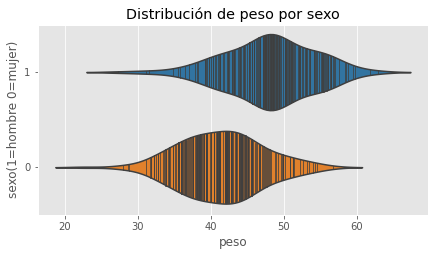

In [ ]:
# Grafico violinplot
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 3.5))
sns.violinplot(
    x       = 'weight',
    y       = 'male',
    data    = datos,
    palette = 'tab10',
    inner   = 'stick',
    ax      = ax
)
ax.set_title('Distribución de peso por sexo')
ax.set_xlabel('peso')
ax.set_ylabel('sexo(1=hombre 0=mujer)');

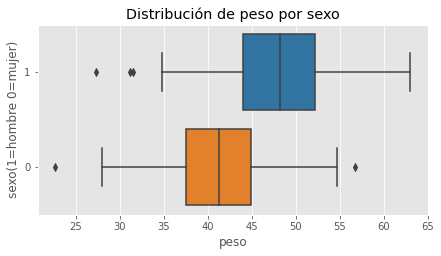

In [ ]:
# Grafico boxplot
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 3.5))
sns.boxplot(
    x       = 'weight',
    y       = 'male',
    data    = datos,
    palette = 'tab10',
    ax      = ax
)
ax.set_title('Distribución de peso por sexo')
ax.set_xlabel('peso')
ax.set_ylabel('sexo(1=hombre 0=mujer)');

El test de Levene, el test de Bartlett y el test de Fligner-Killeen son tres de los test de hipótesis más empleados comparar la varianza entre grupos. En todos ellos, se considera como hipótesis nula que los datos proceden de distribuciones con la misma varianza (homocedasticidad). Por lo tanto, si el p-value es menor que un determinado valor (típicamente 0.05), entonces se considera que hay evidencias suficientes para rechazar la homocedasticidad en favor de la heterocedasticidad.

In [ ]:
# Levene test
# ==============================================================================
levene_test = stats.levene(peso_hombres, peso_mujeres, center='median')
levene_test

LeveneResult(statistic=0.18630521976263306, pvalue=0.6662611053126026)

In [ ]:
# Bartlett test
# ==============================================================================
bartlett_test = stats.bartlett(peso_hombres, peso_mujeres)
bartlett_test

BartlettResult(statistic=0.8473322751459793, pvalue=0.3573081212488608)

In [ ]:
# Levene test
# ==============================================================================
fligner_test = stats.fligner(peso_hombres, peso_mujeres, center='median')
fligner_test

FlignerResult(statistic=0.1376531343594324, pvalue=0.7106253515287645)

In [ ]:
#Ninguno de los test muestra evidencias para rechazar
# la hipótesis de que los dos grupos tienen la misma varianza, homocedasticidad. p-value > 0.05